# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

From a data science perspective, the business objective of identifying key price drivers for used cars translates to a **supervised learning task**. Specifically, we will employ **regression modeling** to address this problem.  The goal is to construct a **data-driven model** capable of predicting used car prices based on a set of **input features**. These features, acting as **independent variables**, will encompass car attributes such as mileage, manufacturing year, vehicle type, and condition. The used car price itself will serve as the **dependent variable**. Through rigorous **regression analysis**, we aim to not only develop an accurate price prediction model but also to derive **actionable insights** into the relative influence of each feature on used car valuations. This will allow us to quantitatively determine the most significant factors driving price fluctuations in the used car market.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

```markdown
### Data Understanding Steps

**1. Load Data and Initial Inspection:**

Load the data into a pandas DataFrame to explore it further.  Examine the first few rows and last few rows of the CSV to get a sense of the data structure, variable types, and potential outliers. Check for nulls or missing values, potential outliers, duplicates, and whether the data "feels right"—is it a valid dataset to answer our questions? Does it include critical fields, or does it look "wrong"? For example, for our purposes, I expect data related to used cars in some relevant manner. I expect it to have sufficient data, sources, and make sense from experience. If the data does not include mileage but has weather information, the dataset is incomplete at best, useless at worst.

**2. Data Profiling and Validation:**

Generate summary statistics for each column (mean, median, standard deviation, min, max, number of unique values, number of missing values, data types). This will help identify potential outliers and data inconsistencies. Validate that the data types in each column are consistent. Note non-numeric columns that may be relevant; we will have to handle these differently.

**3. Missing Data Handling:**

Check for missing data and determine if it can be fixed via imputation or removal. See what percent of data is missing, if there's a pattern to the missing data, and if it makes sense to include it in our analysis.

**4. Outlier Handling:**

Identify outliers using box plots, scatter plots, or z-scores. Handle outliers by removal or transformation.

**5. Duplicate Handling:**

Identify and handle duplicate rows by removal or merging.

```

In [75]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/vehicles.csv")

df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [76]:
df.iloc[15:31]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
15,7223509794,bellingham,13995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
16,7222753076,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
17,7222206015,bellingham,21850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
18,7220030122,bellingham,26850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
19,7218423006,bellingham,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
20,7216672204,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
21,7215617048,bellingham,21850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
22,7213839225,bellingham,26850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
23,7208549803,bellingham,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
24,7213843538,skagit / island / SJI,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa


In [77]:
#lets get some stats
print(df.describe().round(2).astype(str))
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Identify columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index.tolist()

# Print the percentage of missing values for each column
print("Percentage of missing values for each column:\n", missing_percentage)

# how many values in cylinders are missing, and dont follow the pattern: "number text" like "8 cylinders"
# Count missing values (NaN or None)
missing_values = df['cylinders'].isna().sum()

# If empty strings are considered missing, include them
empty_strings = (df['cylinders'] == '').sum()
total_missing = missing_values + empty_strings

print(f"Missing values in 'cylinders': {total_missing}")




                  id         price      year    odometer
count       426880.0      426880.0  425675.0    422480.0
mean   7311486634.22      75199.03   2011.24    98043.33
std       4473170.41   12182282.17      9.45    213881.5
min     7207408119.0           0.0    1900.0         0.0
25%    7308143339.25        5900.0    2008.0     37704.0
50%     7312620821.0       13950.0    2013.0     85548.0
75%     7315253543.5      26485.75    2017.0    133542.5
max     7317101084.0  3736928711.0    2022.0  10000000.0
Percentage of missing values for each column:
 id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.50107

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [78]:
# drop columns that dont matter for price: VIN
df = df.drop("VIN", axis=1)

# drop id
df = df.drop('id', axis=1)

#drop size since it has ~72% absent values
df = df.drop('size', axis=1)


df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [79]:
import re
# Define the regex pattern for "number text" (e.g., "8 cylinders")
pattern = r'^(\d+)\s+\w+$'  # Captures the number in group 1

def extract_number(value):
    # Check for NaN or empty string
    if pd.isna(value) or value == '':
        return value
    # Convert to string for regex
    value_str = str(value)
    # Try to match the pattern
    match = re.match(pattern, value_str)
    if match:
        # Return the number (as string or int, depending on preference)
        return int(match.group(1))  # Extract number as integer
    # For non-matching values, return NaN (or customize as needed)
    return np.nan



In [80]:
# there are mixed type columns that have the numeric data we need
# cyclinders: 8 cylinder - we need just the 8
# figure out the NaN and missing values for each column
# for each non-numeric column, see if we need it and one shot encode if they dont have an order for the values
# Analyze patterns in missing data (correlation between all columns)

# fix cylinders
# Create new column
df['cylinders_extracted'] = df['cylinders'].apply(extract_number)

# Verify the result
print(df[['cylinders', 'cylinders_extracted']].tail(30))
print("\nUnique values in 'cylinders_extracted':", df['cylinders_extracted'].unique())
df = df.drop('cylinders', axis=1)


          cylinders  cylinders_extracted
426850          NaN                  NaN
426851          NaN                  NaN
426852          NaN                  NaN
426853          NaN                  NaN
426854          NaN                  NaN
426855          NaN                  NaN
426856          NaN                  NaN
426857  6 cylinders                  6.0
426858  6 cylinders                  6.0
426859  6 cylinders                  6.0
426860  8 cylinders                  8.0
426861          NaN                  NaN
426862  6 cylinders                  6.0
426863  6 cylinders                  6.0
426864  6 cylinders                  6.0
426865          NaN                  NaN
426866  8 cylinders                  8.0
426867          NaN                  NaN
426868  6 cylinders                  6.0
426869          NaN                  NaN
426870          NaN                  NaN
426871          NaN                  NaN
426872          NaN                  NaN
426873          

In [81]:

# lets start cleaning up some rows/data
# remove or impute


# manufacturer, model

print(df['manufacturer']+"," + df['model'])
#do we have any models without manufacturer and vice versa?

# Define missing values
missing_values = [np.nan, '', 'unknown', 'missing', 'NA', 'N/A', 'nan']
# Create masks for missing values
manufacturer_missing = df['manufacturer'].isin(missing_values) | df['manufacturer'].isna()
model_missing = df['model'].isin(missing_values) | df['model'].isna()

#find all manu without models
manufacturer_model_counts = df.groupby('manufacturer')['model'].apply(lambda x: x.isin(missing_values).all() | x.isna().all())
manufacturers_no_models = manufacturer_model_counts[manufacturer_model_counts].index.tolist()

print("Manufacturers with no models:", manufacturers_no_models)
print("Number of manufacturers with no models:", len(manufacturers_no_models))

if manufacturers_no_models:
    print("\nRows for manufacturers with no models:")
    print(df[df['manufacturer'].isin(manufacturers_no_models)][['manufacturer', 'model']].head())
#we have only 1 manufacturer with no model info: morgan

#models with no manu
model_manufacturer_counts = df.groupby('model')['manufacturer'].apply(lambda x: x.isin(missing_values).all() | x.isna().all())
models_no_manufacturers = model_manufacturer_counts[model_manufacturer_counts].index.tolist()

print("Models with no manufacturers:", models_no_manufacturers)
print("Number of models with no manufacturers:", len(models_no_manufacturers))

if models_no_manufacturers:
    print("\nRows for models with no manufacturers:")
    print(df[df['model'].isin(models_no_manufacturers)][['manufacturer', 'model']].head())

print(f"Count of unique models ", len(df['model'].unique()))
#there are 5902 models with no manufacturers and 29650 unique models

# with this data discrepancy and the scope of this project, we will disregard the model in our price prediction
df = df.drop('model', axis=1)





0                                    NaN
1                                    NaN
2                                    NaN
3                                    NaN
4                                    NaN
                       ...              
426875          nissan,maxima s sedan 4d
426876    volvo,s60 t5 momentum sedan 4d
426877         cadillac,xt4 sport suv 4d
426878             lexus,es 350 sedan 4d
426879      bmw,4 series 430i gran coupe
Length: 426880, dtype: object
Manufacturers with no models: ['morgan']
Number of manufacturers with no models: 1

Rows for manufacturers with no models:
       manufacturer model
182012       morgan   NaN
294930       morgan   NaN
334887       morgan   NaN
Models with no manufacturers: ['%', "'50 Business Coupe", "'99 H1 Hummer", ',,,,,,,', ',2012,2013, SOME 2014 MODELS', ',2017,2016,2015 MODELS', '- 1500 Promaster Vans', '- 4 DOOR ACCORD - SAFETY SENSING', '- 4WD - 5 SEAT - DOUBLE CAB', '- PEARL WHITE HYBRID - 49 MPG', '-1500', "-2018 Car's, 

In [82]:

# this invalidates our thesis that manufacterers can be imputed from models, so lets drop the rows with no manufacturers

# Create mask for missing manufacturers
manufacturer_missing = df['manufacturer'].isin(missing_values) | df['manufacturer'].isna()
df = df[~manufacturer_missing].copy()
print("\nMissing in 'manufacturer' after drop:", df['manufacturer'].isna().sum())



Missing in 'manufacturer' after drop: 0


In [132]:

print(df.columns)

#fill categorical nans as unknowns
print("Condition unique values:"+str(df['condition'].unique())+", count of missing rows:"+str(len(df['condition'].isna())))
#replace nan with "unknown"
df['condition'] = df['condition'].fillna('unknown')

#Colors
print("Colors unique values: "+ str(df['paint_color'].unique()))
df['paint_color'] = df['paint_color'].fillna('unknown')

#fuel
print("fuel unique values: "+ str(df['fuel'].unique()))
df['fuel'] = df['fuel'].fillna('unknown')

#title_status
print("title_status unique values: "+ str(df['title_status'].unique()))
df['title_status'] = df['title_status'].fillna('unknown')

#transmission
print("transmission unique values: "+ str(df['transmission'].unique()))
df['transmission'] = df['transmission'].fillna('unknown')

#drive
print("drive unique values: "+ str(df['drive'].unique()))
df['drive'] = df['drive'].fillna('unknown')

#region
print("region unique values: "+ str(len(df['region'].unique())) + ", nan count:"+ str(df['region'].isna().sum()))
df['region'] = df['region'].fillna('unknown')


#region
print("title_status unique values: "+ str(len(df['title_status'].unique())) + ", nan count:"+ str(df['title_status'].isna().sum()))
df['title_status'] = df['title_status'].fillna('unknown')



Index(['region', 'price', 'year', 'manufacturer', 'condition', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'cylinders_extracted'],
      dtype='object')
Condition unique values:['good' 'excellent' 'fair' 'unknown' 'like new' 'new' 'salvage'], count of missing rows:405083
Colors unique values: ['white' 'blue' 'red' 'black' 'silver' 'grey' 'unknown' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
fuel unique values: ['gas' 'other' 'diesel' 'hybrid' 'unknown' 'electric']
title_status unique values: ['clean' 'rebuilt' 'lien' 'unknown' 'salvage' 'missing' 'parts only']
transmission unique values: ['other' 'automatic' 'manual' 'unknown']
drive unique values: ['unknown' 'rwd' '4wd' 'fwd']
region unique values: 404, nan count:0
title_status unique values: 7, nan count:0


In [133]:
# lets start imputing or cleaning up categorical data
# region - lets see the distribution of region and see if we can impute the mode
region_percentages = (df['region'].value_counts(normalize=True, dropna=False) * 100).sort_values(ascending=False)
print(region_percentages)
# there is no clear region that stands out for sales. lets keep it as is and we will figure out the next steps later

# manufacturer - lets see the distribution of manufacturers and see if we can impute the mode
# there are no unknown manufacturers, skip
print((df['manufacturer']=='unknown').sum())

# state - lets see the distribution of manufacturers and see if we can impute the mode
# there are no unknown states, skip
print("Unknown states: "+str((df['state']=='unknown').sum()+df['state'].isna().sum()))

print("Unknown title_status: "+str((df['title_status']=='unknown').sum()+df['title_status'].isna().sum()))


region
columbus                    0.853899
jacksonville                0.846987
eugene                      0.718865
spokane / coeur d'alene     0.716890
kennewick-pasco-richland    0.715656
                              ...   
meridian                    0.005431
southwest MS                0.003209
kansas city                 0.002222
fort smith, AR              0.001975
west virginia (old)         0.001728
Name: proportion, Length: 404, dtype: float64
0
Unknown states: 0
Unknown title_status: 7204


In [ ]:
# lets check the numerical columns
#year
print("Unknown years: "+str((df['year']=='unknown').sum()+df['year'].isna().sum())) # there are 6 records with unknown years.
# substitute for mode
df['year']=df['year'].fillna(df['year'].mode()[0])

#odometer
print("Unknown odometer: "+str(df['odometer'].isna().sum())) # there are 4151 rows with nan odometer values. Its a fraction of the dataset and one of the most important features.
# drop the rows
df = df.dropna(subset=['odometer'])


Unknown years: 0
Unknown odometer: 0
Unknown cylinders_extracted: 0
Unknown cylinders_extracted after best guess: 0
Unknown cylinders_extracted after best guess manu, year and type: 0
Unknown cylinders_extracted after best guess manu and type: 0
Unknown cylinders_extracted after best guess type: 0
Unknown cylinders_extracted after all fixes: 0


In [ ]:

#cylinders_extracted
print("Unknown cylinders_extracted: "+str(df['cylinders_extracted'].isna().sum())) # there are 167952 rows with nan cylinders_extracted values. 
# lets see if we can get the best guess cylinders based on the manufacturer, year, drive and type

# electric fuel type vehicles have no cylinders - set those to 0
df['cylinders_extracted'] = np.where(
    (df['fuel'] == 'electric'),
    0,
    df['cylinders_extracted']
    )

#cylinders handling
# grouping columns
group_cols = ['manufacturer', 'year', 'drive', 'type']

# Fill function using mode (most frequent cylinder value per group)
def fill_with_mode(series):
    mode_vals = series.mode()
    return mode_vals[0] if not mode_vals.empty else np.nan

# Apply the mode fill for each group
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(
    df.groupby(group_cols)['cylinders_extracted'].transform(fill_with_mode)
)
#check again
print("Unknown cylinders_extracted after best guess: "+str(df['cylinders_extracted'].isna().sum())) # there are 71170 rows with nan cylinders_extracted values left over
# group cols by manufacturer, year and type - cut out drive
group_cols = ['manufacturer', 'year', 'type']
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(
    df.groupby(group_cols)['cylinders_extracted'].transform(fill_with_mode)
)
#check again
print("Unknown cylinders_extracted after best guess manu, year and type: "+str(df['cylinders_extracted'].isna().sum())) # there are 63683 rows with nan cylinders_extracted values left over

# group cols by manufacturer and type - cut out drive
group_cols = ['manufacturer', 'type']
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(
    df.groupby(group_cols)['cylinders_extracted'].transform(fill_with_mode)
)
#check again
print("Unknown cylinders_extracted after best guess manu and type: "+str(df['cylinders_extracted'].isna().sum())) # there are 60235 rows with nan cylinders_extracted values left over


group_cols = ['type']
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(
    df.groupby(group_cols)['cylinders_extracted'].transform(fill_with_mode)
)
#check again
print("Unknown cylinders_extracted after best guess type: "+str(df['cylinders_extracted'].isna().sum())) # there are 59763 rows with nan cylinders_extracted values left over
#just mode the remaining
df['cylinders_extracted'] = df['cylinders_extracted'].fillna(df['cylinders_extracted'].mode()[0])
#check again
print("Unknown cylinders_extracted after all fixes: "+str(df['cylinders_extracted'].isna().sum())) # now we are all good


--- Numerical Feature Correlations with Price ---
price                  1.000000
odometer               0.010838
cylinders_extracted    0.002868
year                  -0.005495
Name: price, dtype: float64

--- Scatter Plots (Numerical vs. Price) ---


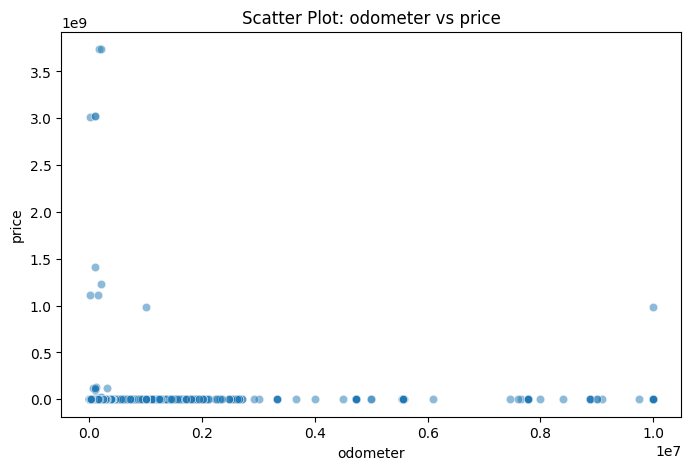

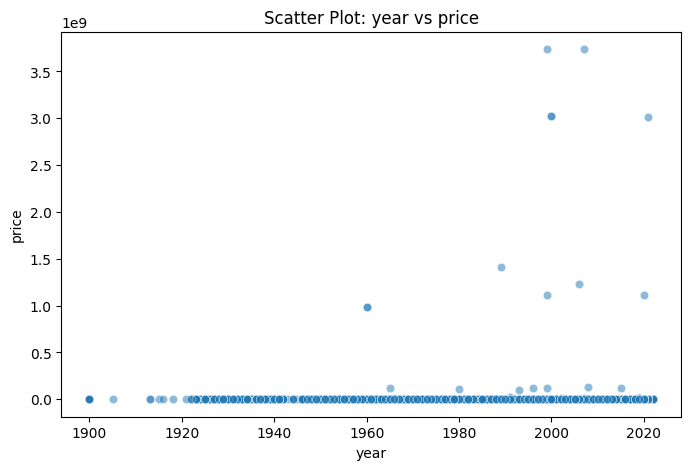

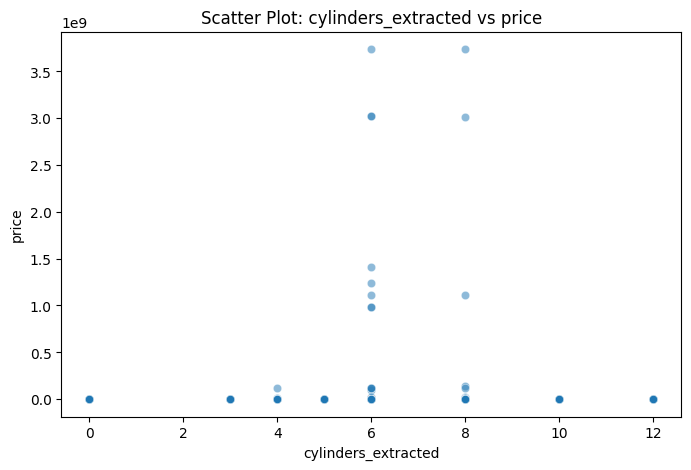

In [139]:
# lets do some uni and multivariate analysis and as part of it, lets see how outliers affect price

import seaborn as sns
import matplotlib.pyplot as plt


target_col = 'price'
numerical_cols = ['odometer', 'year', 'cylinders_extracted'] 
categorical_cols = ['region', 'manufacturer', 'condition', 'fuel',  'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state'] 
# Ensure all columns (except price) are in either numerical_cols or categorical_cols
feature_cols = numerical_cols + categorical_cols

print("--- Numerical Feature Correlations with Price ---")
# Ensure 'price' is also numeric
numeric_data_for_corr = df[numerical_cols + [target_col]]
correlation_matrix = numeric_data_for_corr.corr()
print(correlation_matrix[target_col].sort_values(ascending=False))

# Visualize with scatter plots
print("\n--- Scatter Plots (Numerical vs. Price) ---")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=target_col, alpha=0.5) # Use alpha for large datasets
    plt.title(f'Scatter Plot: {col} vs {target_col}')
    plt.show()

#remove outliers with IQR for numerical columns: year, price, odometer (cylinders - what would be outliers here?)





# there are multiple columns that are non-numeric and could be relevant, # region, manufacturer, model, condition, lets ohe them

#check corr


Mean and Median Price by region:
                       mean   median  count
region                                     
frederick        5183252.27  16590.0    273
delaware         3387404.23   9400.0    897
humboldt county  3085757.02  12995.0    362
modesto          1573967.58  12849.5   2644
knoxville        1420893.64  15900.0   2663
eugene           1297565.78   9963.0   2912
south jersey     1066841.09   9397.0   2872
birmingham        673642.73  13950.0   1505
stillwater        660829.03  26439.0    194
indianapolis      588887.43  13775.0   2160


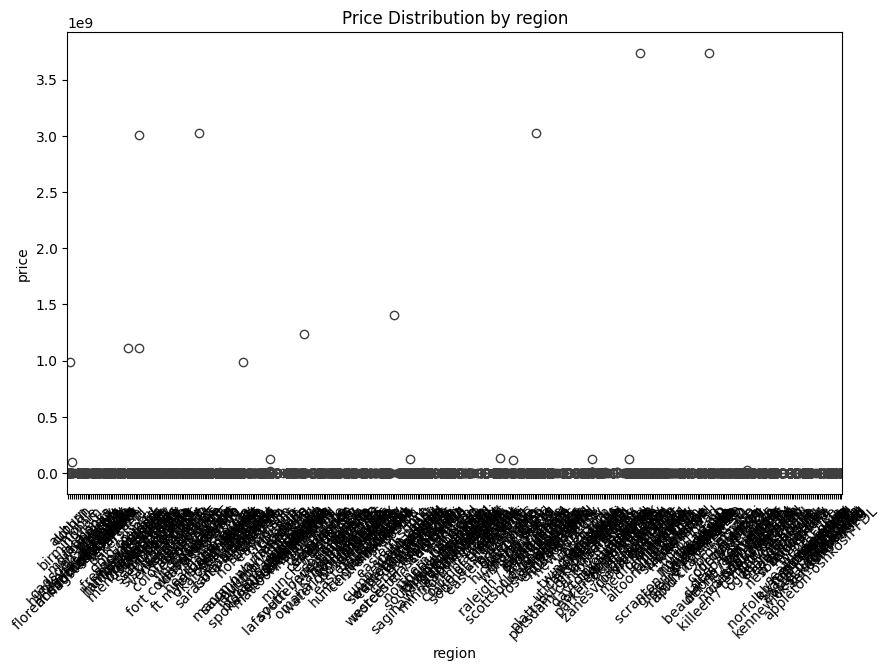


Mean and Median Price by manufacturer:
                    mean   median  count
manufacturer                            
mercedes-benz  541181.34  15988.0  11595
volvo          385556.50  12999.0   3358
toyota         237061.27  12000.0  33790
jeep           152234.87  16900.0  18814
chevrolet      116927.42  14500.0  54414
ferrari        107438.74  98900.0     95
aston-martin    53494.54  46997.5     24
tesla           38442.52  37990.0    866
buick           37066.50  11500.0   5452
ford            36691.09  15000.0  70313


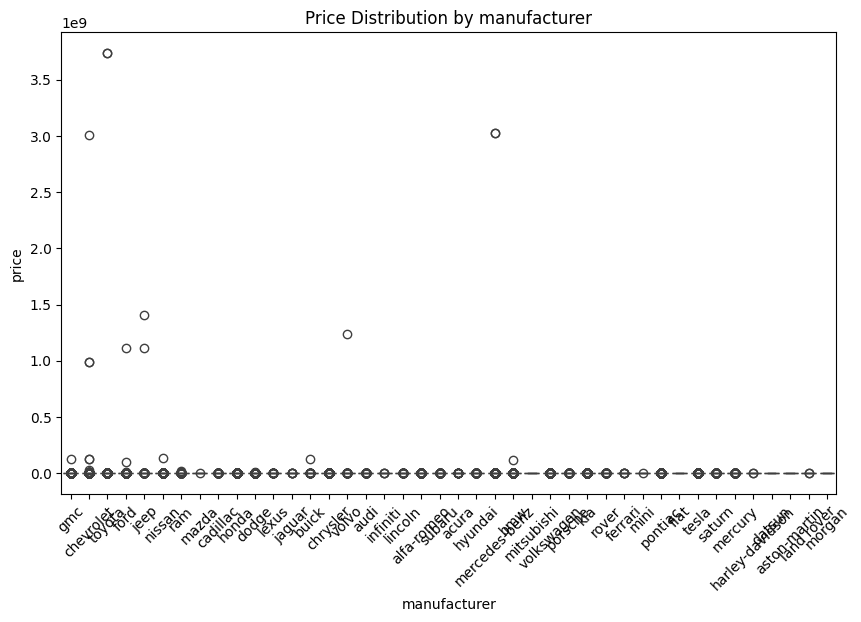


Mean and Median Price by condition:
                mean   median   count
condition                            
fair       833826.25   2800.0    6170
unknown    101990.90  13118.0  165014
excellent   53214.64  10995.0   95972
like new    37093.32  13950.0   20212
good        31112.23  20590.0  115994
new         23763.96  16000.0    1170
salvage      3681.99   1850.0     551


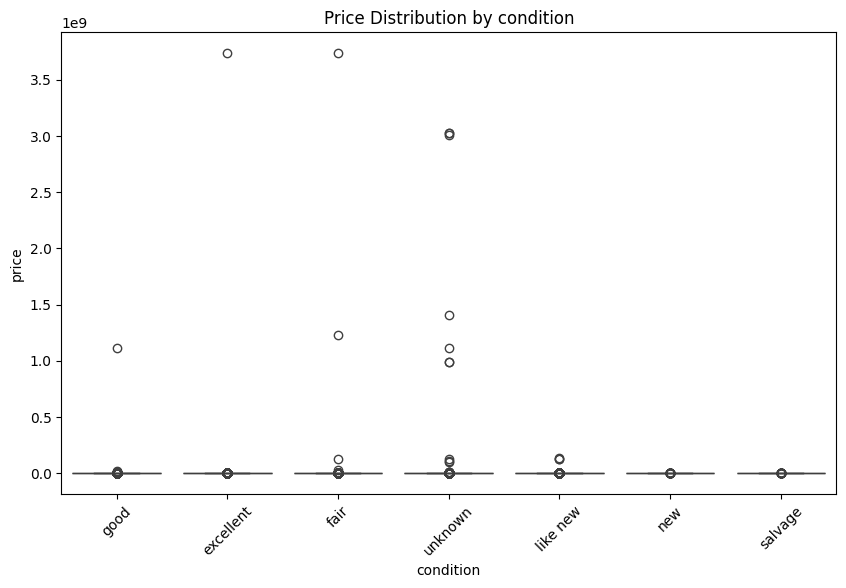


Mean and Median Price by fuel:
               mean   median   count
fuel                                
diesel    126792.46  28900.0   26173
gas        76222.27  12000.0  340834
other      68709.64  25990.0   29357
electric   25519.27  24995.0    1611
unknown    19750.53  16999.0    2009
hybrid     14623.15  11995.0    5099


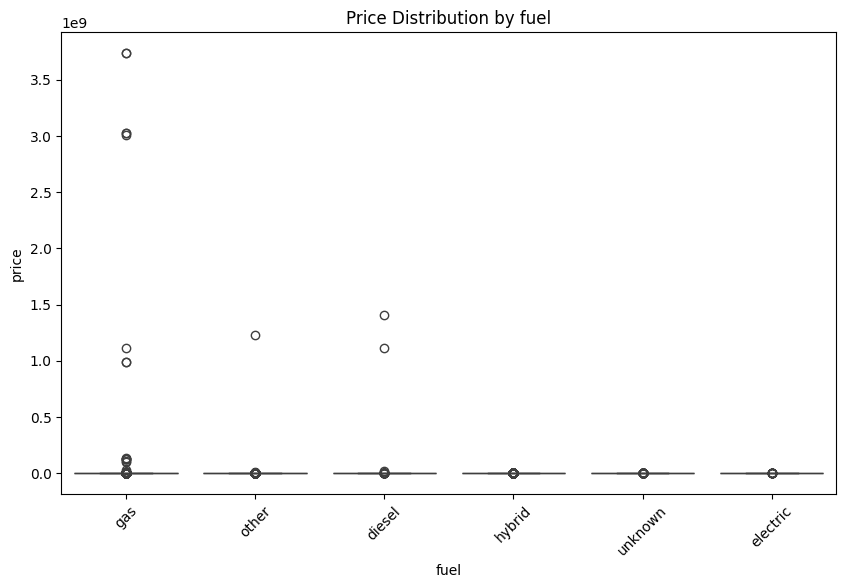


Mean and Median Price by title_status:
                  mean   median   count
title_status                           
clean         80956.46  14000.0  385091
missing       25993.43   2500.0     647
lien          22024.73  17960.0    1345
rebuilt       14996.41  10000.0    6945
unknown       14953.83  11888.0    7204
salvage        9669.35   7100.0    3701
parts only     2899.75   1150.0     150


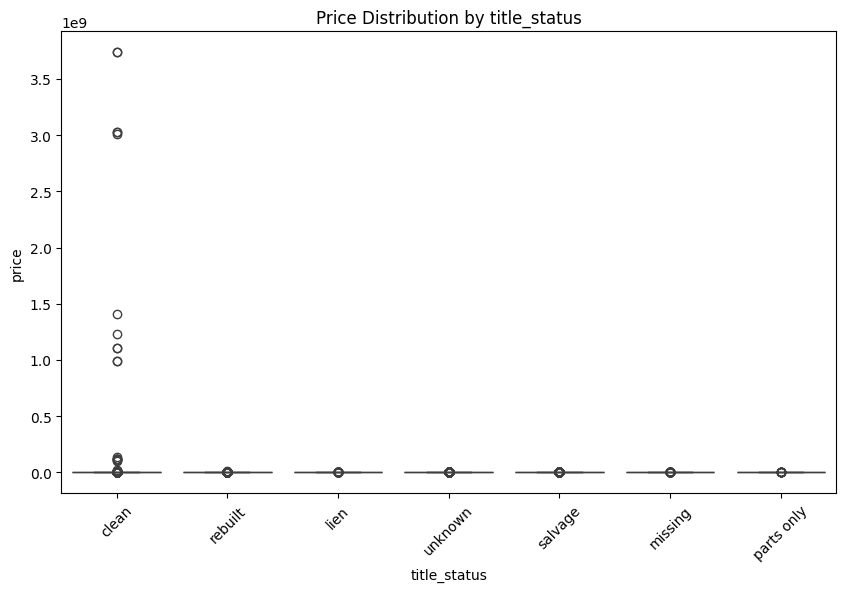


Mean and Median Price by transmission:
                   mean   median   count
transmission                            
manual        222903.76   9000.0   22123
automatic      77250.07  11500.0  321109
other          28234.58  28590.0   60227
unknown        20115.15  14995.0    1624


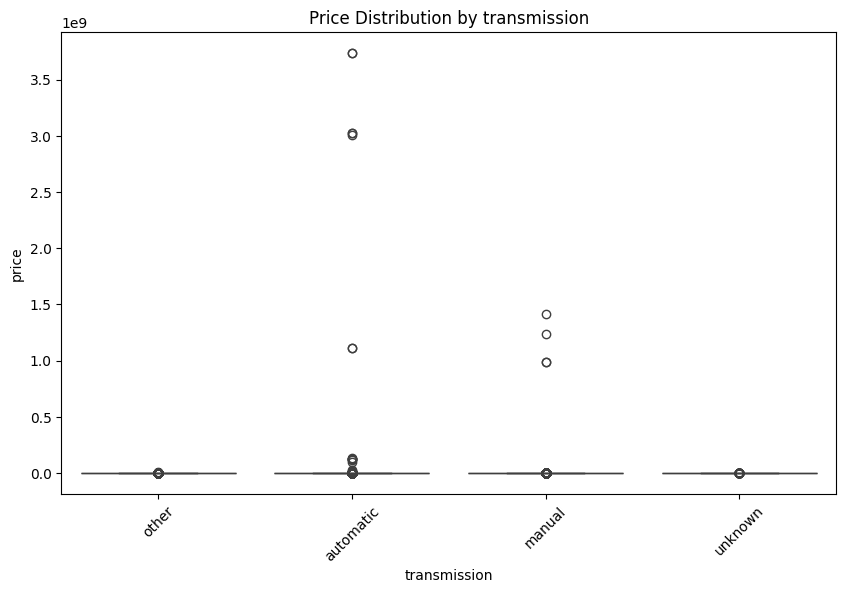


Mean and Median Price by drive:
              mean   median   count
drive                              
4wd      114408.51  18400.0  128490
unknown  108128.51  13879.0  121804
rwd       40111.58  16999.0   53656
fwd       14308.71   9500.0  101133


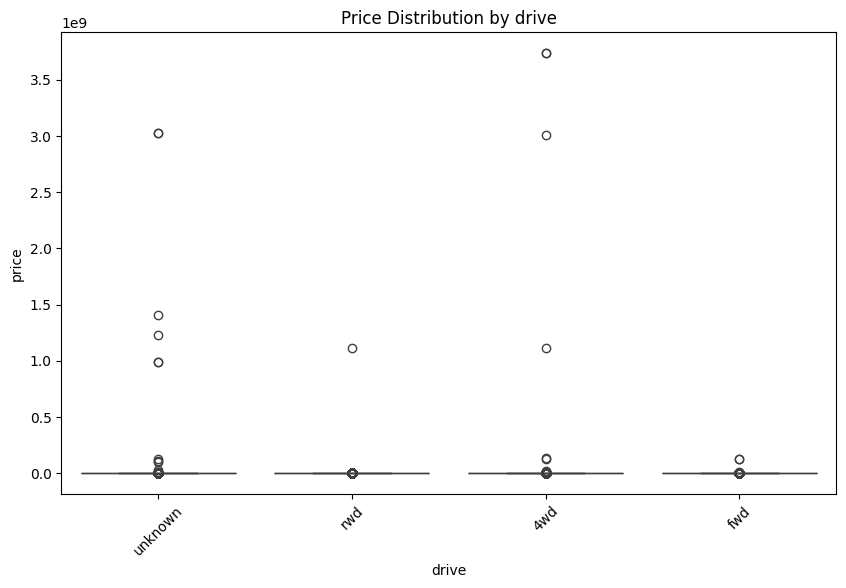


Mean and Median Price by type:
                  mean   median  count
type                                  
pickup       144880.75  27990.0  42387
SUV           35016.16  13495.0  74963
truck         29543.36  20995.0  33464
other         25540.12  26788.0  20947
coupe         21884.76  18997.0  17566
convertible   20133.42  15590.0   7082
van           17182.80  14995.0   8232
sedan         15905.20   9995.0  83637
offroad       15648.66  12500.0    571
hatchback     14631.58  13765.0  15311


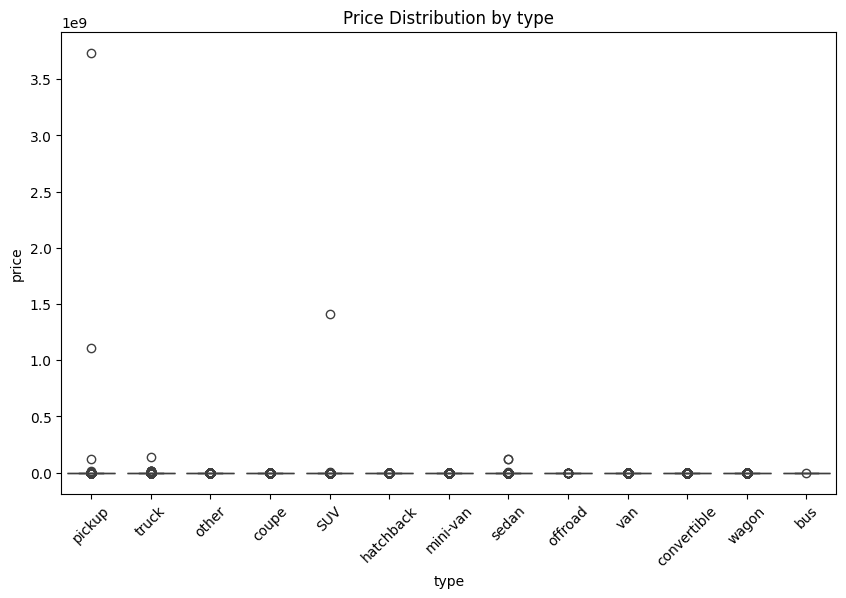


Mean and Median Price by paint_color:
                  mean   median   count
paint_color                            
green        570415.85   7995.0    6702
unknown      130093.58  10998.0  122242
silver       105741.29  12295.0   41533
black         44297.62  17500.0   60701
white         37075.63  17999.0   74861
red           22688.13  15500.0   28638
grey          20322.16  10900.0   23555
yellow        18622.16  15000.0    1789
orange        18194.46  16995.0    1818
blue          16301.23  12900.0   29832


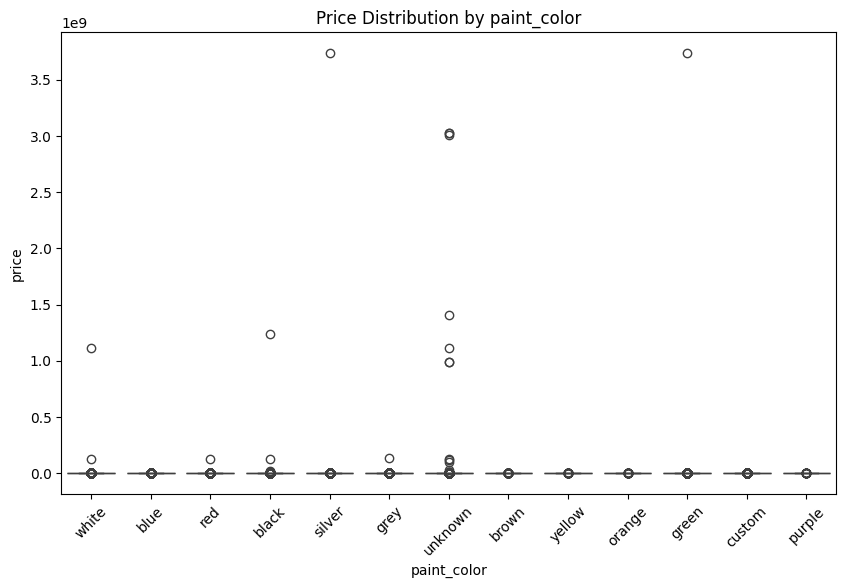


Mean and Median Price by state:
             mean   median  count
state                            
de     3387404.23   9400.0    897
tn      371810.68  17590.0  10638
nj      338738.37  10595.0   9336
md      327531.41  14700.0   4545
al      253913.38  19000.0   4652
in      246533.89  16590.0   5437
or      244000.26   9995.0  16378
ga      169319.05  17500.0   6559
ca      126761.05  12995.0  47476
ok       37726.34  14998.0   6381


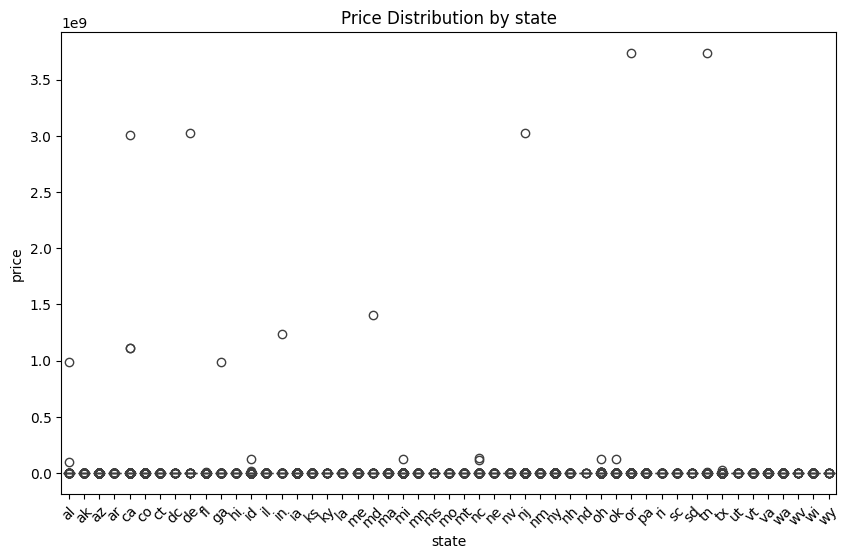

In [140]:
#lets try the categorical values

for col in categorical_cols:
    print(f"\nMean and Median Price by {col}:")
    group_stats = df.groupby(col)['price'].agg(['mean', 'median', 'count']).round(2).sort_values('mean', ascending=False)

    print(group_stats.head(10))
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [143]:
# not getting a stong corelation and there are outliers in the data skewing our analysis
#IQR and more cleanup

from scipy.stats import iqr

# Numerical columns
numerical_cols = ['price', 'odometer', 'cylinders_extracted', 'year']


# Original shape
print("\nOriginal shape:", df.shape)

# Identify rows with negative odometer or price
negative_rows = df[(df['odometer'] < 0) | (df['price'] < 0)]
print("\nRows with negative odometer or price:", len(negative_rows), f"({len(negative_rows) / len(df) * 100:.2f}%)")
if not negative_rows.empty:
    print("Sample of negative rows:\n", negative_rows[['odometer', 'price', 'manufacturer', 'condition']].head())

# Remove rows with negative odometer or price
df = df[(df['odometer'] >= 0) & (df['price'] >= 0)].copy()

# Function to detect and count outliers
def detect_outliers(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = iqr(df[column], nan_policy='omit')  # Compute IQR, ignoring NaN
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound) | df[column].isna()]
    return outliers, lower_bound, upper_bound

# Inspect outliers
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers(df, col)
    print(f"\n{col} Outliers:")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers (including NaN): {len(outliers)} ({len(outliers) / len(df) * 100:.2f}%)")
    if not outliers.empty:
        print(f"Sample of outliers (top 5):\n", outliers[[col, 'price']].head())


# Remove outliers
df_no_outliers = df.copy()
for col in numerical_cols:
    min_value = 0 if col in ['price', 'odometer'] else None
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = iqr(df_no_outliers[col], nan_policy='omit')
    lower_bound = max(Q1 - 1.5 * IQR, min_value if min_value is not None else float('-inf'))
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[df_no_outliers[col].notna() & (df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    print(f"Shape after dropping {col} outliers:", df_no_outliers.shape)

# Rows dropped
print(f"\nRows dropped: {df.shape[0] - df_no_outliers.shape[0]} ({(df.shape[0] - df_no_outliers.shape[0]) / df.shape[0] * 100:.2f}%)")

# Summaries after outlier removal
print("\nSummaries after outlier removal:")
for col in numerical_cols:
    print(f"{col}:\n{df_no_outliers[col].describe()}")

#reset
df = df_no_outliers




Original shape: (405083, 14)

Rows with negative odometer or price: 0 (0.00%)

price Outliers:
Lower bound: -24762.50, Upper bound: 57257.50
Number of outliers (including NaN): 7276 (1.80%)
Sample of outliers (top 5):
          price      price
204      58977      58977
280  987654321  987654321
346      98900      98900
365      72900      72900
461      99950      99950

odometer Outliers:
Lower bound: -104698.50, Upper bound: 276017.50
Number of outliers (including NaN): 3425 (0.85%)
Sample of outliers (top 5):
       odometer      price
138   281000.0       4000
280   999999.0  987654321
411   279000.0       4500
455  9999999.0      22500
484   283356.0      11500

cylinders_extracted Outliers:
Lower bound: 1.00, Upper bound: 9.00
Number of outliers (including NaN): 3562 (0.88%)
Sample of outliers (top 5):
      cylinders_extracted  price
463                 10.0  39995
783                 10.0  24990
791                 10.0  22990
823                 10.0  30990
830             

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405083 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   region               405083 non-null  object 
 1   price                405083 non-null  int64  
 2   year                 405083 non-null  float64
 3   manufacturer         405083 non-null  object 
 4   condition            405083 non-null  object 
 5   fuel                 405083 non-null  object 
 6   odometer             405083 non-null  float64
 7   title_status         405083 non-null  object 
 8   transmission         405083 non-null  object 
 9   drive                405083 non-null  object 
 10  type                 319550 non-null  object 
 11  paint_color          405083 non-null  object 
 12  state                405083 non-null  object 
 13  cylinders_extracted  405083 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 46.4+ MB


409234

In [ ]:
correlation_matrix = df.corr()
print("\nCorrelation matrix :\n", correlation_matrix)

# Decision on imputation or removal (requires further user input and domain knowledge)
# This part is highly dependent on the context and the user's goals.  
# A simple approach is presented below, but a more robust solution would require
# more information about the data and the analysis goals.

# Example: Simple removal of rows with any missing values
df_no_missing = df.dropna()
print(f"\nShape of DataFrame after removing rows with missing values: {df_no_missing.shape}")

# Example: Simple imputation of missing values using mean for numerical columns
# and mode for categorical columns
for col in columns_with_missing:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print(f"\nShape of DataFrame after imputation: {df.shape}")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.